In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

X = torch.arange(-5,5,0.1).view(-1,1)
func = -5 * X

Y = func + 0.4 * torch.rand(X.size())

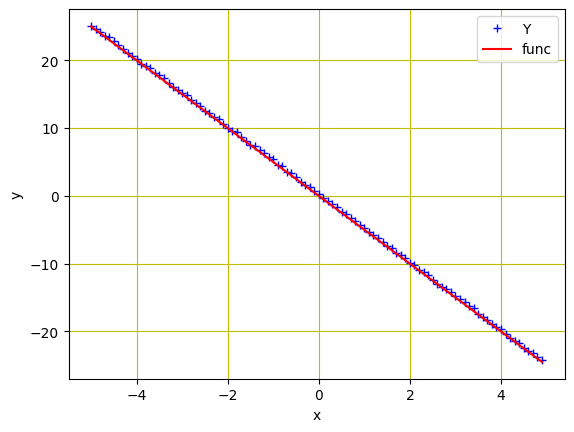

In [2]:
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

In [3]:
def forward(x):
    return w * x + b

def MSE(y_pred,y):
    return torch.mean((y_pred - y)**2)

In [4]:
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

step_size = 0.1
loss_BGD = []
n_iter = 30

In [6]:
#batch gradient descent
print('step \t loss \t weight \t bias')
for i in range(n_iter):
    
    y_pred = forward(X)
    loss = MSE(y_pred,Y)
    loss_BGD.append(loss.item())
    
    loss.backward()
    
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    
    w.grad.data.zero_()
    b.grad.data.zero_()    
    
    print(f'{i}, \t{loss.item():4f} \t{w.item():4f} \t{b.item():4f}')

step 	 loss 	 weight 	 bias
0, 	606.436340 	-1.865040 	-16.009953
1, 	349.720306 	-7.251157 	-12.736565
2, 	206.745697 	-3.625883 	-10.171716
3, 	124.727386 	-6.018292 	-8.083584
4, 	76.454460 	-4.401674 	-6.437002
5, 	47.435776 	-5.463492 	-5.103570
6, 	29.697788 	-4.741925 	-4.047443
7, 	18.716043 	-5.212649 	-3.195326
8, 	11.852283 	-4.890155 	-2.518339
9, 	7.532490 	-5.098489 	-1.973525
10, 	4.800173 	-4.954082 	-1.539757
11, 	3.065794 	-5.046064 	-1.191298
12, 	1.962103 	-4.981227 	-0.913451
13, 	1.258512 	-5.021695 	-0.690525
14, 	0.809423 	-4.992474 	-0.512589
15, 	0.522530 	-5.010185 	-0.369948
16, 	0.339142 	-4.996945 	-0.256013
17, 	0.221867 	-5.004637 	-0.164732
18, 	0.146849 	-4.998593 	-0.091784
19, 	0.098851 	-5.001895 	-0.033365
20, 	0.068138 	-4.999109 	0.013337
21, 	0.048482 	-5.000500 	0.050726
22, 	0.035902 	-4.999198 	0.080624
23, 	0.027851 	-4.999768 	0.104555
24, 	0.022697 	-4.999148 	0.123694
25, 	0.019399 	-4.999370 	0.139012
26, 	0.017287 	-4.999069 	0.151264
2

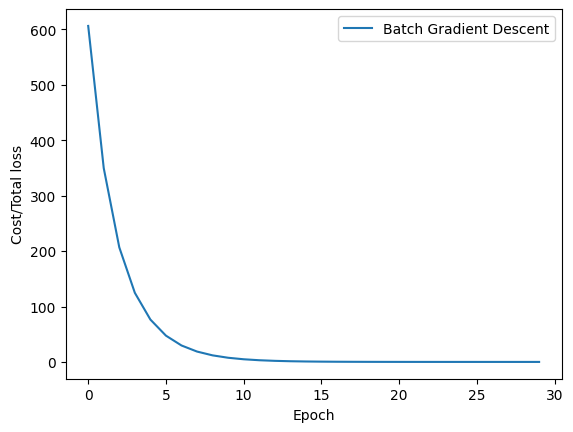

In [7]:
plt.plot(loss_BGD, label='Batch Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Cost/Total loss')
plt.legend()
plt.show()

In [17]:
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X
Y = func + 0.4 * torch.randn(X.size())
 
def forward(x):
    return w * x + b
 
def MSE(y_pred, y):
    return torch.mean((y_pred - y) ** 2)
 
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)
 
step_size = 0.1
loss_SGD = []
n_iter = 20
 
for i in range (n_iter):    
    Y_pred = forward(X)
    loss_SGD.append(MSE(Y_pred, Y).tolist())
 
    for x, y in zip(X, Y):
        y_hat = forward(x)
        loss = MSE(y_hat, y)
        loss.backward()

        w.data = w.data - step_size * w.grad.data
        b.data = b.data - step_size * b.grad.data

        w.grad.data.zero_()
        b.grad.data.zero_()


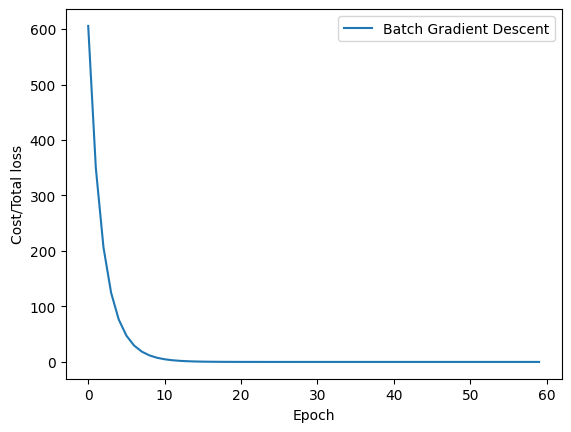

In [18]:
plt.plot(loss_BGD, label="Batch Gradient Descent")
plt.xlabel('Epoch')
plt.ylabel('Cost/Total loss')
plt.legend()
plt.show()

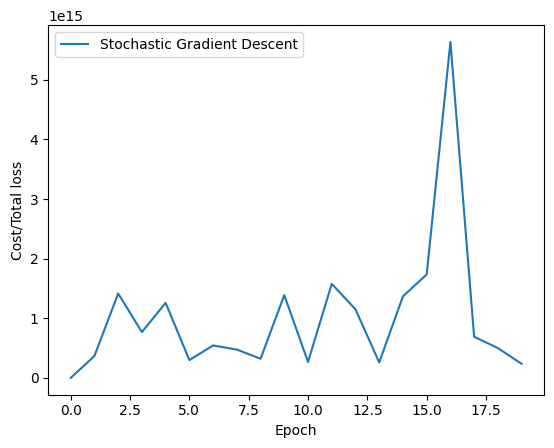

In [19]:
plt.plot(loss_SGD,label="Stochastic Gradient Descent")
plt.xlabel('Epoch')
plt.ylabel('Cost/Total loss')
plt.legend()
plt.show()